# **Case Study: Iris Dataset Classification Using Logistic Regression**

### 1. **Introduction**
The **Iris dataset** is a foundational dataset in machine learning and statistics, frequently used for classification and clustering tasks.. It comprises measurements of sepal length, sepal width, petal length, and petal width for **150** iris flowers, belonging to three different species: **setosa**, **versicolor**, and **virginica**. This case study demonstrates how to use **Logistic Regression** to **classify** iris flowers based on these measurements.

This case study demonstrates a complete workflow for classifying iris species using a Logistic Regression model. It covers data loading, exploratory data analysis through visualization, data splitting for model training and evaluation, model training, and performance assessment using key metrics and visualizations.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*9ut2vvn6drS53dSL.png" alt="Iris Flower Types" title="Iris Flower Species" />

### 2. **Methodology**
The approach taken in this case study follows a standard machine learning pipeline:

1. **Data Loading and Initial Inspection**: The Iris dataset is loaded, and its structure and initial rows are examined to understand the data.

2. **Exploratory Data Analysis (EDA)**: Visualizations are employed to understand the relationships between features and how they differentiate the species.

3. **Data Preparation**: The dataset is divided into training and testing subsets to ensure unbiased model evaluation.

4. **Model Training**: A Logistic Regression classifier is trained on the prepared training data.

5. **Model Evaluation**: The trained model's performance is assessed using accuracy, a confusion matrix, and an analysis of feature importance.

### 3. **Implementation Details**
The code is implemented in Python using libraries such as **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and **Scikit-learn**


In [3]:
import numpy as np #matrix library
import pandas as pd #data frames: 2d matrices
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
#mother of machine learning - sklearn (scikit learn)
from sklearn.datasets import load_iris #dataset that we are trying to solve for
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix 

>3.1. **Data Loading and Exploration**: The Iris dataset is loaded using `load_iris()` from the `sklearn.datasets()` library. The features (`X`) and target (`y`) are extracted, along with their respective names. A Pandas DataFrame is then constructed to facilitate data visualization. The first few rows of the dataset, the dataset shape, feature names, and target classes are printed for inspection.

In [12]:
# Loading the dataset
print("=== 1. Loading the Iris Dataset ===")
iris = load_iris() #calling function which will return an object
# print(type(iris))
# print(iris)
X = iris.data #data segregated in the form of features of X samples
y = iris.target #true values
# print(type(X))
# print(y)

=== 1. Loading the Iris Dataset ===


In [15]:
# Loading Feature names and Target names
feature_names = iris.feature_names
target_names = iris.target_names #classification labels
print("=== 2. Feature Names ===")
print(feature_names)
print("=== 3. Target Names ===")
print(target_names)

=== 2. Feature Names ===
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
=== 3. Target Names ===
['setosa' 'versicolor' 'virginica']


In [16]:
# Creating a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

print("\nFirst five rows of the dataset:")
print(df.head()) #specify the number inside head to customize the view count of the number of rows
print("\nDataset shape:", X.shape)
print("Features:", feature_names)
print("Target classes:", target_names)


First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


>3.2. **Data Visualization: Pair Plot of Iris Features**: A crucial step in understanding any dataset is visualization. A `pairplot` from the Seaborn library is used to show pairwise relationships between all features. The `hue='species'` argument colors the data points according to their species, making it easy to visually identify clusters and separability. This plot is instrumental in exploratory data analysis.
>
>The **diagonal subplots** of the pair plot show the **distribution of each individual feature**, while the **off-diagonal** subplots show **scatter plots of feature pairs**. This allows for a comprehensive analysis of feature correlation and reveals patterns that might indicate how well the species can be distinguished.


=== 2. Visualizing the Data ===


<Figure size 1200x800 with 0 Axes>

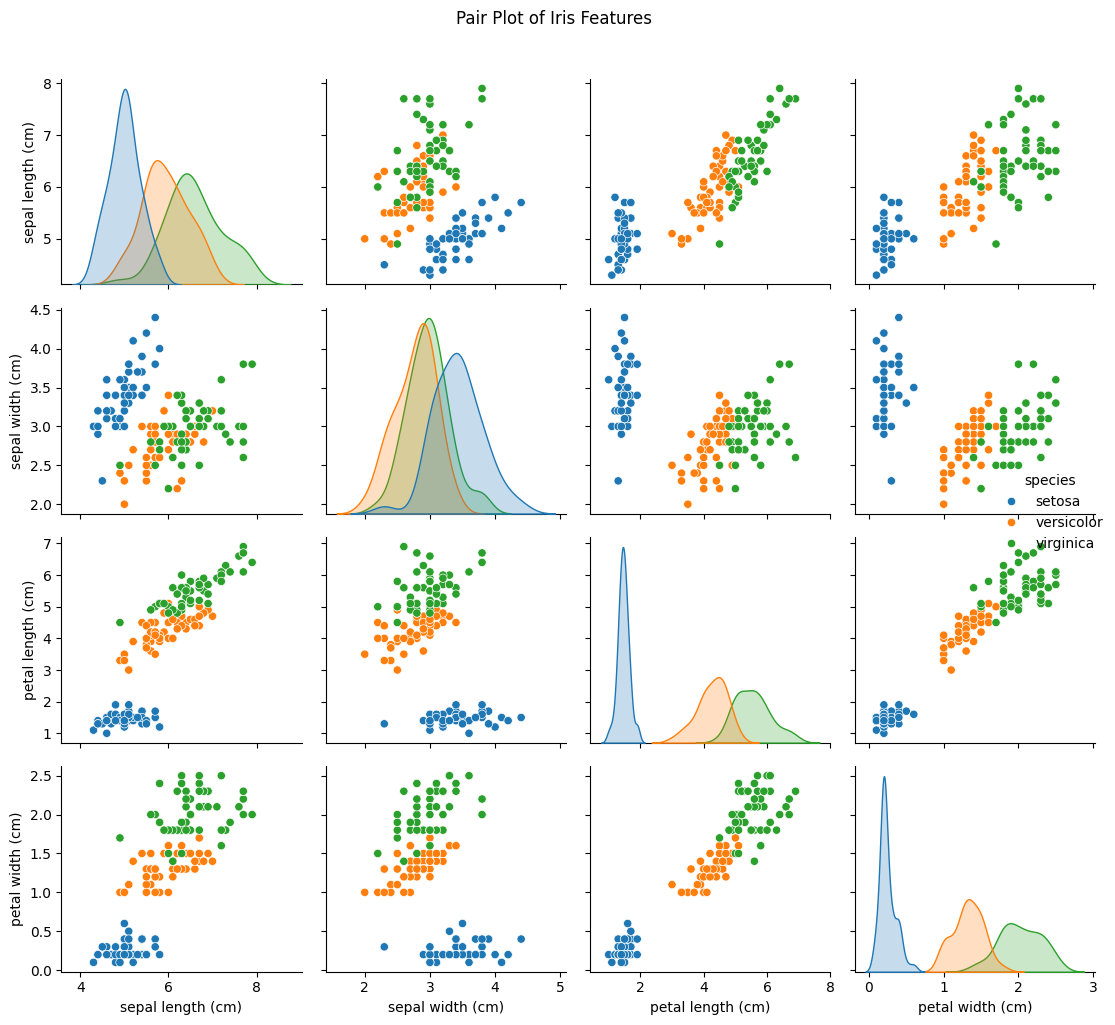

In [18]:
# Plotting pair plot to understand relation of different features
print("\n=== 2. Visualizing the Data ===")
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='species') #species is a column name in df
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.tight_layout()
plt.show()

> 3.3. **Data Preparation: Splitting into Training and Testing Sets**: To objectively evaluate the model's performance on unseen data, the dataset is split into **training** and **testing** sets. A common split ratio is **80%** for training and **20%** for testing, as done here using `train_test_split()` with `random_state=42` for reproducibility.

In [20]:
# Split the Data for Testing and Training
print("\n=== 3. Preparing Data for Training ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


=== 3. Preparing Data for Training ===
Training set size: 120 samples
Testing set size: 30 samples


> 3.4. **Model Training: Logistic Regression**: Logistic Regression is chosen for this classification task due to its simplicity, interpretability, and effectiveness on linearly separable data. The model is initialized with `max_iter=1000` to ensure the `optimization algorithm converges`, especially for larger datasets or more complex problems. The model is then trained using the `fit` method on the training data.

In [22]:
# Train the model
print("\n=== 4. Training the Classifier ===")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training completed!")


=== 4. Training the Classifier ===
Model training completed!


> 3.5. **Model Performance Evaluation**: After training, the model's ability to generalize to new data is evaluated.
> 
> 3.5.1. **Accuracy Score**
>
>  The accuracy score provides a quick measure of the proportion of correctly classified instances.

In [24]:
# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


> 3.5.2. **Confusion Matrix**
>
> A confusion matrix is a **powerful visualization tool** for understanding the **performance** of a classification model. It shows the number of **true positive**, **true negative**, **false positive**, and **false negative** predictions. For multi-class classification, it displays how many instances of each true class were predicted as each possible class. A heatmap visualization of the confusion matrix makes it easy to interpret.
>
> This matrix helps identify specific classes where the model might be struggling (e.g., misclassifying Versicolor as Virginica).


=== 5. Model Performance ===


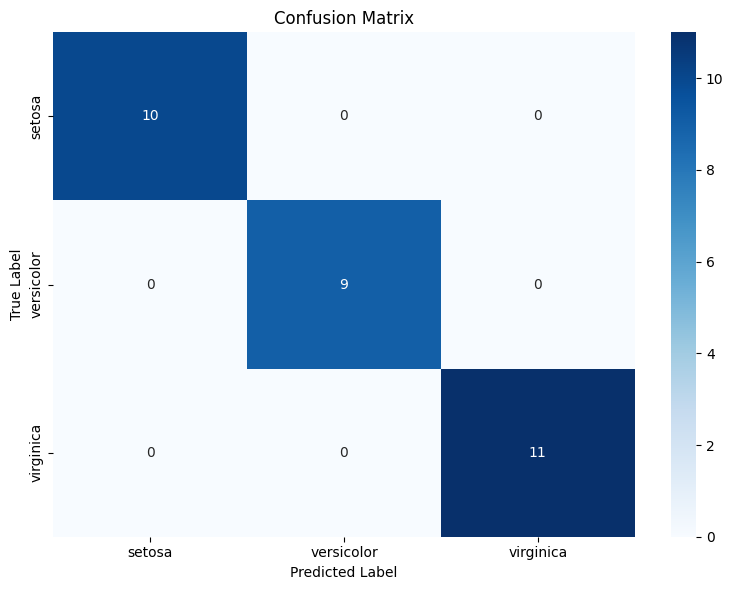

In [26]:
# Show confusion matrix and evaluate model performance
print("\n=== 5. Model Performance ===")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

plt.show()

> 3.5.3. **Feature Importance**
>
>For **linear models** like Logistic Regression, the **coefficients** can indicate the **importance of each feature** in making predictions. The **absolute value of the coefficients** is used as a **proxy** for **feature importance**. A bar plot visualizes these importances, showing which features the model relies on most heavily.
>
>This plot helps in understanding the underlying decision-making process of the model and can highlight which physical measurements of the iris flower are most influential in distinguishing its species.


=== 6. Feature Importance ===


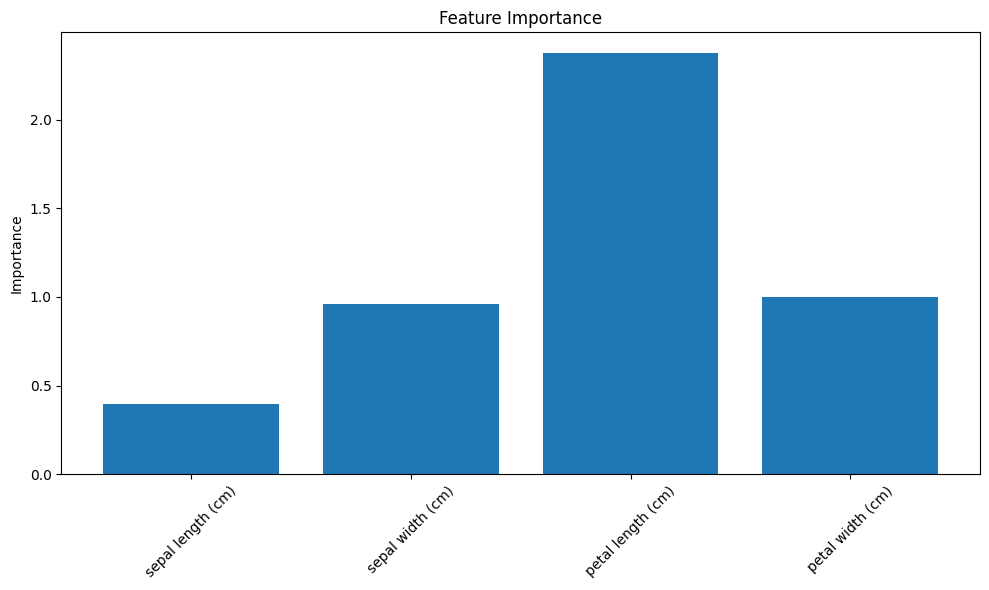

In [27]:
# Show feature importance
print("\n=== 6. Feature Importance ===")
importance = np.abs(model.coef_[0])
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### 4. **Results and Discussion**
The Logistic Regression model successfully classified the Iris dataset with high accuracy. The pair plot clearly showed that Setosa is linearly separable from the other two species, while Versicolor and Virginica have some overlap, making their classification slightly more challenging.

The confusion matrix confirmed the model's strong performance, with most predictions falling on the diagonal (correct classifications). Any off-diagonal values indicate misclassifications. The feature importance plot revealed which of the four measurements (sepal length, sepal width, petal length, petal width) were most impactful in the model's predictions. Typically, petal length and petal width are found to be highly discriminative features for the Iris dataset.

### 4. **Conclusion**
This case study effectively demonstrates the application of Logistic Regression for classification on the classic Iris dataset. Through clear code implementation and insightful visualizations, we were able to load, explore, train, and evaluate a machine learning model. The use of pair plots, confusion matrices, and feature importance plots significantly enhanced the understanding of both the dataset and the model's performance. This comprehensive approach provides a solid foundation for more complex classification tasks.